In [1]:
import pandas as pd
import numpy as np

#Let's keep all the imports in a place
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
"""#Using google colab. Comment if not using
from google.colab import drive
drive.mount('/content/drive')"""

"#Using google colab. Comment if not using\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [3]:
#Again, change the path as per your needs.
#path_train='/content/drive/My Drive/Colab Notebooks/train_Df64byy.csv'
#path = 'creditcard.csv'

#path_test='/content/drive/My Drive/Colab Notebooks/test_YCcRUnU.csv'
path_train='train_Df64byy.csv'
#path = 'creditcard.csv'

path_test='test_YCcRUnU.csv'

In [4]:
#Let's read the files
df_train = pd.read_csv(path_train)
df_train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [5]:
df_test = pd.read_csv(path_test)
df_test

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [7]:
df_test.info()
#Test data doesn't have the response column obviously.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


## Exploratory Data Analysis

In [8]:
#Let's do a null check first!
df_train.isnull().sum()*100/len(df_train)

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

We see that <b>Health Indicator, Holding_Policy_Duration and Holding_Policy_Type</b> has a lot of null values. Need to handle those.

In [9]:
df_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [10]:
#Printing the unique values in the Health_Indicator and Holding_Policy_Duration
print('Value counts in the Holding Policy type:\n', df_train['Holding_Policy_Type'].value_counts())
print('Value counts in the Health Indicator:\n' ,df_train['Health Indicator'].value_counts())
print('Value counts in the Holding Policy Duration:\n' ,df_train['Holding_Policy_Duration'].value_counts())

Value counts in the Holding Policy type:
 3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64
Value counts in the Health Indicator:
 X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
Value counts in the Holding Policy Duration:
 1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64


#### Now my first intiution was to remove the null values or even replace with mode. Naive! The empty values basically represents the people who aren't holding any policy right now.

Way I am going to handle this is replace the null values in the way below,
- Holding policy type: 0 (Indicating not holding any policy)
- Holding policy duration: 0 (Indicating not holding any policy)

### Handling the null values in Holding_Policy_Type & Holding_Policy_Duration

In [11]:
df_train['Holding_Policy_Type'].fillna(0, inplace = True)
df_train['Holding_Policy_Duration'].fillna("0", inplace = True)

df_test['Holding_Policy_Type'].fillna(0, inplace = True)
df_test['Holding_Policy_Duration'].fillna("0", inplace = True)

In [12]:
print('Value counts in the Holding Policy type:\n', df_train['Holding_Policy_Type'].value_counts())
print('Value counts in the Holding Policy Duration:\n' ,df_train['Holding_Policy_Duration'].value_counts())

print('Value counts in the Holding Policy type:\n', df_test['Holding_Policy_Type'].value_counts())
print('Value counts in the Holding Policy Duration:\n' ,df_test['Holding_Policy_Duration'].value_counts())

Value counts in the Holding Policy type:
 0.0    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64
Value counts in the Holding Policy Duration:
 0       20251
1.0      4499
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64
Value counts in the Holding Policy type:
 0.0    8603
3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64
Value counts in the Holding Policy Duration:
 0       8603
14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64


In [13]:
pd.set_option('display.max_rows', 500)
df_train[['Holding_Policy_Type', 'Health Indicator', 'Holding_Policy_Duration']].head(100)

,Holding_Policy_Type,Health Indicator,Holding_Policy_Duration
0,3.0,X1,14+
1,0.0,X2,0
2,1.0,NaN,1.0
3,3.0,X1,14+
4,1.0,X2,3.0
5,1.0,X2,5.0
6,0.0,NaN,0
7,4.0,X4,9.0
8,3.0,X1,14.0
9,4.0,NaN,7.0


The missing values in Health Indicators can be divided into two ways,
1. People who hold a policy but haven't updated their Health status - Replace with mode
2. New people who don't hold a policy hence haven't updated their Health status - X0 indicating they don't hold any policy

In [14]:
##Replacing the null values with no holding policy as X0

mask = (df_train['Holding_Policy_Type'] == 0)
avg_filler = "X0"

df_train.loc[df_train['Health Indicator'].isnull() & mask, 'Health Indicator'] = avg_filler

In [15]:
mask = (df_test['Holding_Policy_Type'] == 0)
avg_filler = "X0"

df_test.loc[df_test['Health Indicator'].isnull() & mask, 'Health Indicator'] = avg_filler

In [16]:
#Now, let us handle the case, where user has a holding policy and hasn't updated his health status. 
#In this case, replacing the null value with the mode.
df_train['Health Indicator'] = df_train['Health Indicator'].replace(np.nan, df_train['Health Indicator'].mode()[0])
df_test['Health Indicator'] = df_test['Health Indicator'].replace(np.nan, df_test['Health Indicator'].mode()[0])

In [17]:
#Let's verify if the null values have been handled
df_test.isnull().sum()*100/len(df_test)

ID                         0.0
City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
dtype: float64

All the null values have been handled properly now. </br>
We can now move ahead. Finally!

## Data Understanding

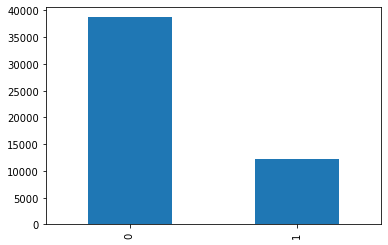

In [18]:
#Let's us now visualize the value count in the response column
classes = pd.value_counts(df_train['Response'], sort = True).sort_index()
classes.plot(kind = 'bar')
plt.figsize = (50,30)

In [19]:
df_train['Response'].value_counts()*100/len(df_train['Response'])

0    76.005267
1    23.994733
Name: Response, dtype: float64

In [20]:
#Before we move ahead, let's do outlier analysis
df_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,1.468417,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.434988,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,0.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,0.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,1.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


<AxesSubplot:xlabel='Reco_Policy_Premium'>

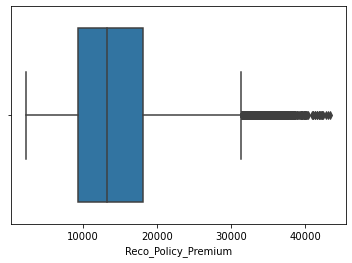

In [21]:
#I think there might be some outliers in Reco_Policy_Premium. Let check out using a box plot
sns.boxplot(x = df_train['Reco_Policy_Premium'])

<AxesSubplot:xlabel='Reco_Policy_Premium'>

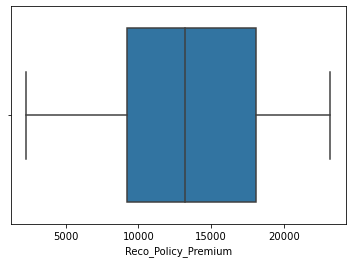

In [22]:
#Replacing the outliers with the value of the 90th percentile
df_train["Reco_Policy_Premium"] = np.where(df_train["Reco_Policy_Premium"] > df_train['Reco_Policy_Premium'].quantile(0.90), df_train['Reco_Policy_Premium'].quantile(0.90) ,df_train['Reco_Policy_Premium'])
df_test["Reco_Policy_Premium"] = np.where(df_test["Reco_Policy_Premium"] > df_test['Reco_Policy_Premium'].quantile(0.90), df_test['Reco_Policy_Premium'].quantile(0.90) ,df_test['Reco_Policy_Premium'])
sns.boxplot(x = df_train['Reco_Policy_Premium'])

<AxesSubplot:>

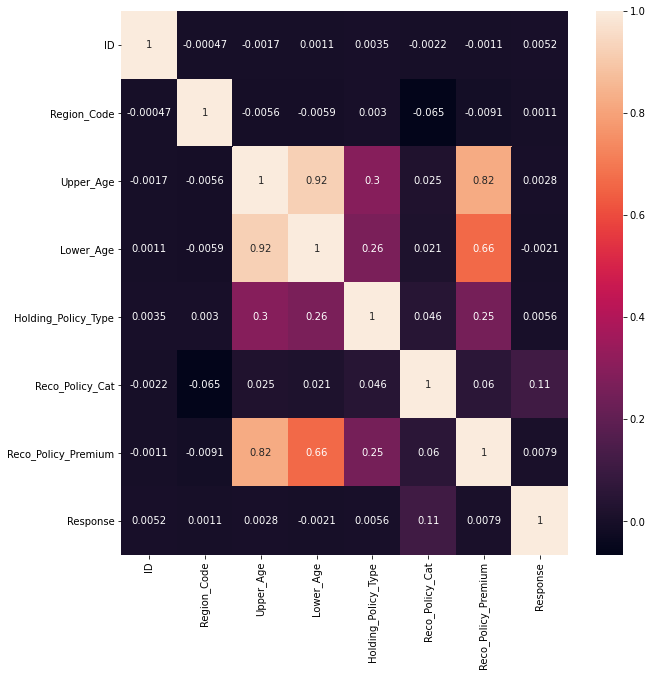

In [23]:
#Let's do a initial correlation analysis
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot = True)

We see that there is a high correlation between the lower age and upper age. Now, I don't want to use both the columns. Instead, I will take the average of the two columns and call it approximate_age.
$$Approximate Age = (Upper Age + Lower Age)/2$$

In [24]:
df_train['approximate_age'] = (df_train['Upper_Age'] + df_train['Lower_Age'])/2
df_train[['Reco_Policy_Premium', 'approximate_age', 'Upper_Age', 'Lower_Age']]

,Reco_Policy_Premium,approximate_age,Upper_Age,Lower_Age
0,11628.0,36.0,36,36
1,23167.2,48.5,75,22
2,7450.0,32.0,32,32
3,17780.0,50.0,52,48
4,10404.0,44.0,44,44
...,...,...,...,...
50877,7704.0,22.0,22,22
50878,5408.0,27.0,27,27
50879,11374.0,63.0,63,63
50880,23167.2,60.0,71,49


In [25]:
#Now, let's drop the variables Upper Age and Low Age for the training dataset and do the same for the test dataset
df_train = df_train.drop('Upper_Age', 1)
df_train = df_train.drop('Lower_Age', 1)
#df_train = df_train.drop('approximate_age', 1)
#df_train = df_train.drop('Reco_Policy_Premium', 1)

#Doing the same operation for the test dataset
df_test['approximate_age'] = (df_test['Upper_Age'] + df_test['Lower_Age'])/2
#df_test['Reco_Policy_Premium_Rate'] = df_test['Reco_Policy_Premium']/df_test['approximate_age']
df_test = df_test.drop('Upper_Age', 1)
df_test = df_test.drop('Lower_Age', 1)
#df_test = df_test.drop('approximate_age', 1)
#df_test = df_test.drop('Reco_Policy_Premium', 1)

print(df_train.head(10))
print(df_test.head(10))

   ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type Is_Spouse  \
0   1        C3         3213            Rented          Individual        No   
1   2        C5         1117             Owned               Joint        No   
2   3        C5         3732             Owned          Individual        No   
3   4       C24         4378             Owned               Joint        No   
4   5        C8         2190            Rented          Individual        No   
5   6        C9         1785            Rented          Individual        No   
6   7        C3          679             Owned          Individual        No   
7   8        C1         3175             Owned               Joint       Yes   
8   9       C15         3497             Owned               Joint        No   
9  10        C1          530             Owned               Joint       Yes   

  Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
0               X1                     14+          

<AxesSubplot:xlabel='approximate_age'>

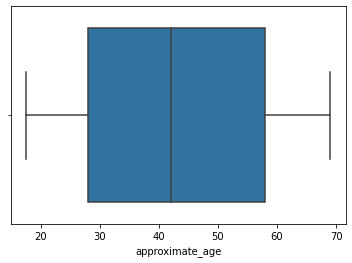

In [26]:
#Replacing the outliers with the value of the 90th percentile
df_train["approximate_age"] = np.where(df_train["approximate_age"] > df_train['approximate_age'].quantile(0.90), df_train['approximate_age'].quantile(0.90) ,df_train['approximate_age'])
df_test["approximate_age"] = np.where(df_test["Reco_Policy_Premium"] > df_test['approximate_age'].quantile(0.90), df_test['approximate_age'].quantile(0.90) ,df_test['approximate_age'])
sns.boxplot(x = df_train['approximate_age'])

<AxesSubplot:>

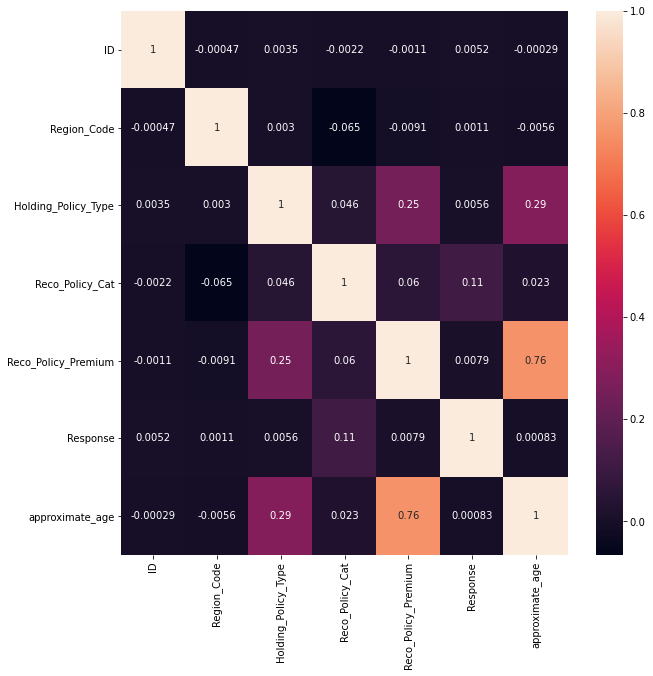

In [27]:
#Let's check the correlation again
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot = True)

Let us handle the multi-collinearity at a later stage

There are few categorical variables. We need to convert them to numeric. Categorical variables are as below,


1.   City_Code
2.   Accomodation_Type
3.   Reco_Insurance_Type
4.   Is_Spouse
5.   Health Indicator



In [28]:
#Let us check the unique values in each of the above column
print('Unique values in city code=', df_train['City_Code'].unique())
print('Unique values in Accomodation type=', df_train['Accomodation_Type'].unique())
print('Unique values in Reco_Insurance_type=', df_train['Reco_Insurance_Type'].unique())
print('Unique values in Is_Spouse=', df_train['Is_Spouse'].unique())
print('Unique values in Health Indicator=', df_train['Health Indicator'].unique())
print('Unique values in Holding Policy Duration=', df_train['Holding_Policy_Duration'].unique())
print('Unique values in Holding Policy Type=', df_train['Holding_Policy_Type'].unique())

Unique values in city code= ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Unique values in Accomodation type= ['Rented' 'Owned']
Unique values in Reco_Insurance_type= ['Individual' 'Joint']
Unique values in Is_Spouse= ['No' 'Yes']
Unique values in Health Indicator= ['X1' 'X2' 'X0' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Unique values in Holding Policy Duration= ['14+' '0' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
Unique values in Holding Policy Type= [3. 0. 1. 4. 2.]


First, let us handle the columns with only 2 levels,


1.   Accomodation type
2.   Reco_Insurance_type
3.   Is_Spouse

We can handle the rest of the columns separately

In [29]:
df_train['Accomodation_Type'] = df_train['Accomodation_Type'].map({'Rented': 0, 'Owned': 1})
df_train['Reco_Insurance_Type'] = df_train['Reco_Insurance_Type'].map({'Individual': 0, 'Joint': 1})
df_train['Is_Spouse'] = df_train['Is_Spouse'].map({'No': 0, 'Yes': 1})

df_test['Accomodation_Type'] = df_test['Accomodation_Type'].map({'Rented': 0, 'Owned': 1})
df_test['Reco_Insurance_Type'] = df_test['Reco_Insurance_Type'].map({'Individual': 0, 'Joint': 1})
df_test['Is_Spouse'] = df_test['Is_Spouse'].map({'No': 0, 'Yes': 1})

In [30]:
df_train[['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse']]

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse
0,0,0,0
1,1,1,0
2,1,0,0
3,1,1,0
4,0,0,0
...,...,...,...
50877,0,0,0
50878,0,0,0
50879,0,0,0
50880,1,1,0


Let us now also handle the rest of the column by getting the dummy variable for the same.


1.   City_Code
2.   Health Indicator
3.   Holding Policy type
4.   Reco_Policy_Cat
5.   Holding Policy Duration

In [31]:
df_train = pd.get_dummies(df_train, columns=['City_Code','Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Holding_Policy_Duration'],  drop_first = True)
df_train

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Reco_Policy_Premium,Response,approximate_age,City_Code_C10,City_Code_C11,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
0,1,3213,0,0,0,11628.0,0,36.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,1117,1,1,0,23167.2,0,48.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3732,1,0,0,7450.0,1,32.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4378,1,1,0,17780.0,0,50.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,2190,0,0,0,10404.0,0,44.0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,845,0,0,0,7704.0,0,22.0,0,0,...,0,0,0,0,0,0,0,0,0,0
50878,50879,4188,0,0,0,5408.0,0,27.0,0,0,...,0,0,0,0,0,0,0,1,0,0
50879,50880,442,0,0,0,11374.0,0,63.0,0,0,...,1,0,0,0,0,0,0,0,0,0
50880,50881,4,1,1,0,23167.2,1,60.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
df_test = pd.get_dummies(df_test, columns=['City_Code','Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Holding_Policy_Duration'],  drop_first = True)
df_test

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Reco_Policy_Premium,approximate_age,City_Code_C10,City_Code_C11,City_Code_C12,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
0,50883,156,1,0,0,11934.0,69.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50884,7,1,1,1,23104.0,69.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,50885,564,0,0,0,9240.0,69.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,50886,1177,0,0,0,9086.0,69.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,50887,951,1,0,0,22534.0,69.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,1044,1,0,0,15884.0,69.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21801,72684,266,1,0,0,21390.0,69.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21802,72685,2470,1,0,0,17836.0,69.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21803,72686,1676,0,0,0,11568.0,69.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Before we move to the modeling part, we should scale the necessary features,


1.   Reco_policy_premium rate

In [33]:
#Region code seems more of a category variable. Like a pin code. 
#However, including it in our model can give weird results.
#Weird how? Higher region code doesn't neccessaryly mean better probability of buying a policy
#So in my opinion, it is better if we just drop that variable.

df_train = df_train.drop('Region_Code', axis = 1)
df_test = df_test.drop('Region_Code', axis = 1)

In [34]:
#Something doesn't feel right about handling region code as a numeric value
#For each of the city code, we see that the numeric value is spread out. Not much we can do here.

#Let's scale rest of the features.
scaler = StandardScaler()

df_train['Reco_Policy_Premium'] = scaler.fit_transform(df_train['Reco_Policy_Premium'].values.reshape(-1,1))
df_train

,ID,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Reco_Policy_Premium,Response,approximate_age,City_Code_C10,City_Code_C11,City_Code_C12,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
0,1,0,0,0,-0.373527,0,36.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,1,1,0,1.677346,0,48.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,-1.116087,1,32.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,0.719874,0,50.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0,-0.591069,0,44.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,0,0,0,-1.070943,0,22.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50878,50879,0,0,0,-1.479013,0,27.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50879,50880,0,0,0,-0.418670,0,63.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
50880,50881,1,1,0,1.677346,1,60.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df_test['Reco_Policy_Premium'] = scaler.fit_transform(df_test['Reco_Policy_Premium'].values.reshape(-1,1))
df_test

,ID,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Reco_Policy_Premium,approximate_age,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,...,Holding_Policy_Duration_14+,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
0,50883,1,0,0,-0.331940,69.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50884,1,1,1,1.666223,69.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,50885,0,0,0,-0.813861,69.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,50886,0,0,0,-0.841409,69.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,50887,1,0,0,1.564257,69.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,1,0,0,0.374662,69.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21801,72684,1,0,0,1.359611,69.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21802,72685,1,0,0,0.723848,69.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21803,72686,0,0,0,-0.397413,69.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

#### Train Test Split

In [36]:
y = df_train['Response']

In [37]:
df1 = df_train.copy()
df1.drop(['Response', 'ID'], axis=1, inplace=True)

X = df1

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1, stratify = y)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45793, 89)
(45793,)
(5089, 89)
(5089,)


In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [41]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [42]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [43]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [44]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results




In [45]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [46]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
      


In [47]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [48]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
  



In [49]:
cols = list(X.columns.values)

In [50]:
#Removing the ID column from the final test dataset

df_test = df_test.drop('ID', axis=1)

In [51]:
#Trying the models above, XGBoost and LogisticRegression L2 seems like a good baseline model to start with 
#Let us start with XGBoost first as the baseline model

#### XGBoost

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.7553546865788957
Confusion Matrix


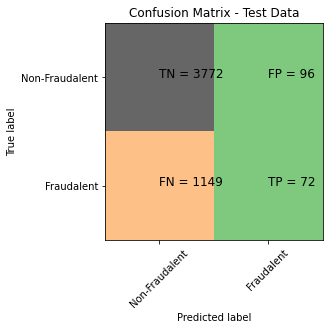

classification Report
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      3868
           1       0.43      0.06      0.10      1221

    accuracy                           0.76      5089
   macro avg       0.60      0.52      0.48      5089
weighted avg       0.69      0.76      0.68      5089

XGboost roc_value: 0.6590275995653452
XGBoost threshold: 0.192623108625412
ROC for the test dataset 65.9%


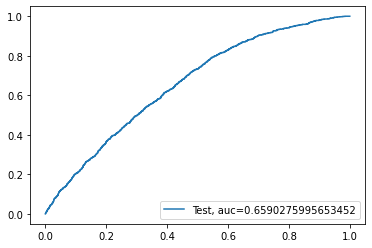

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train, y_train)
y_pred = XGBmodel.predict(X_test)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

In [53]:
XGB_probs_test_dataset = XGBmodel.predict_proba(df_test)[:, 1]

In [54]:
#XGB_probs_test_dataset = XGBmodel.predict_proba(df_test)[:, 1]
np.savetxt("foo.csv", XGB_probs_test_dataset, delimiter=",")
#Using this baseline model we got a score of 0.6355 on the test dataset.

#### Logistic regression with L2 regularlization

Max auc_roc for l2: 0.6242843057736018
Parameters for l2 regularisations
[[ 6.25176011e-03  1.41222365e-01 -1.29803806e-01  1.07603980e-02
  -7.38483420e-04  4.36197658e-02  1.82501479e-02 -1.82613526e-02
   3.62223075e-01  5.40435348e-02 -1.16216698e-01  2.40594403e-02
   2.95289955e-02  1.29042954e-02  3.58374626e-01  1.95893391e-02
  -2.48298223e-02 -9.62125882e-02  1.31383271e-01  2.48502471e-01
   2.11207456e-01  1.24678239e-01 -5.30571620e-02  4.06150131e-01
   3.26852988e-01  2.38878863e-01  2.31339301e-02  5.08917049e-01
  -2.75721214e-01  5.91572196e-01  1.60075944e-01  3.89512996e-01
   4.94662770e-01 -3.30482568e-01  8.85980777e-02  1.35760960e-01
   2.19846690e-02  2.66865919e-02  1.89721272e-01  2.20274631e-01
   4.51667824e-02  5.07062444e-02  1.93585868e-02  5.95435634e-02
  -2.01741247e-04  4.82573620e-02  3.19867625e-01 -1.92736003e-02
  -8.90563965e-02  1.59824841e-02 -3.38418097e-02  9.02879120e-02
  -8.64227343e-02  1.39830277e+00  1.81257748e+00  6.65979034e-01
   

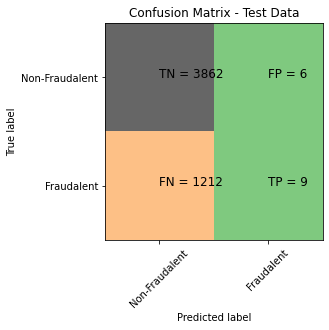

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3868
           1       0.60      0.01      0.01      1221

    accuracy                           0.76      5089
   macro avg       0.68      0.50      0.44      5089
weighted avg       0.72      0.76      0.66      5089

l2 roc_value: 0.626236123780074
l2 threshold: 0.22038064185858589
ROC for the test dataset 62.6%


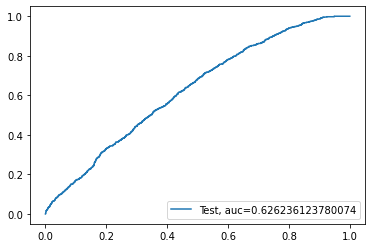

In [55]:
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)

print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 

#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred_l2)
print("classification Report")
print(classification_report(y_test, y_pred_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
  
#df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

In [56]:
y_pred_probs_l2_test_dataset = searchCV_l2.predict_proba(df_test)[:, 1]

In [57]:
np.savetxt("foo.csv", y_pred_probs_l2_test_dataset, delimiter=",")
#Using this baseline model we got a score of 0.6355 on the test dataset.

Now that we have our base models, let us try Hyperparameter tuning.

### Hyperparameter tuning XGBoost

In [80]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}

# instantiate the model
rf = XGBClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="roc_auc",return_train_score=True, n_jobs=-1)
rf.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [81]:
rf.cv_results_, rf.best_params_, rf.best_score_

({'mean_fit_time': array([  9.91208599,  29.30611932,  54.69392016,  84.6439177 ,
         116.78056917, 154.43656633, 184.88713732, 183.65122738]),
  'std_fit_time': array([ 0.20940602,  1.76806409,  0.91032382,  1.24260309,  2.78955792,
          4.54373307,  1.98155287, 22.73013041]),
  'mean_score_time': array([0.1529901 , 0.06761966, 0.06303141, 0.05784543, 0.05674815,
         0.06795833, 0.06991634, 0.06023223]),
  'std_score_time': array([0.05682213, 0.03585094, 0.01811083, 0.02775011, 0.00659165,
         0.02325638, 0.00963368, 0.01485252]),
  'param_max_depth': masked_array(data=[2, 7, 12, 17, 22, 27, 32, 37],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 7},
   {'max_depth': 12},
   {'max_depth': 17},
   {'max_depth': 22},
   {'max_depth': 27},
   {'max_depth': 32},
   {'max_depth': 37}],
  'split0_test_score': array([0.67169025, 0.67299802, 

In [82]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'min_samples_leaf': range(0, 200, 20)}

# instantiate the model
rf = XGBClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="roc_auc",return_train_score=True, n_jobs=-1)
rf.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=7, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [83]:
rf.cv_results_, rf.best_params_, rf.best_score_

({'mean_fit_time': array([37.98799715, 39.10471318, 39.23526378, 38.84241409, 38.80611148,
         38.95840509, 38.96448815, 39.04527199, 39.05335062, 29.0400316 ]),
  'std_fit_time': array([ 0.82203274,  0.58361549,  0.5829466 ,  0.48875821,  0.34147438,
          0.45568138,  0.45897605,  0.20399931,  0.37896315, 11.67226817]),
  'mean_score_time': array([0.08976128, 0.07529888, 0.0740021 , 0.06552505, 0.05664887,
         0.06662257, 0.05655084, 0.05824418, 0.05734751, 0.04278605]),
  'std_score_time': array([0.02765688, 0.02339903, 0.02943316, 0.02493734, 0.00876119,
         0.02137456, 0.00994377, 0.01342659, 0.01389909, 0.00610653]),
  'param_min_samples_leaf': masked_array(data=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 0},
   {'min_samples_leaf': 20},
   {'min_samples_leaf': 

In [84]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'min_samples_split': range(2, 80, 5)}

# instantiate the model
rf = XGBClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="roc_auc",return_train_score=True, n_jobs=-1)
rf.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=7, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [85]:
rf.cv_results_, rf.best_params_, rf.best_score_

({'mean_fit_time': array([39.23925195, 39.34886012, 39.35065455, 39.21761165, 39.35504119,
         39.07638917, 39.05115631, 39.06362231, 39.13194029, 39.24823008,
         39.35713747, 39.32921267, 39.20305018, 39.29610057, 39.17682085,
         29.38829932]),
  'std_fit_time': array([ 0.79155815,  0.58302115,  0.53037192,  0.48466107,  0.49415204,
          0.43014145,  0.42500194,  0.27272046,  0.38582073,  0.24289741,
          0.30492723,  0.32241748,  0.29102314,  0.3055319 ,  0.31834497,
         11.43149838]),
  'mean_score_time': array([0.07789199, 0.08437488, 0.07510006, 0.06163611, 0.05934217,
         0.06692121, 0.07140965, 0.05784564, 0.05654948, 0.06343138,
         0.05754759, 0.05545249, 0.05126276, 0.05146458, 0.05864258,
         0.0404943 ]),
  'std_score_time': array([0.02712459, 0.02938726, 0.02734713, 0.01884914, 0.01571457,
         0.01529178, 0.02158129, 0.01655669, 0.01302674, 0.01255385,
         0.01248919, 0.01154629, 0.00890052, 0.00839249, 0.01111949,
 

In [86]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'criterion': ['gini', 'entropy']}

# instantiate the model
rf = XGBClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="roc_auc",return_train_score=True, n_jobs=-1)
rf.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=7, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [87]:
rf.cv_results_, rf.best_params_, rf.best_score_

({'mean_fit_time': array([39.11498547, 29.24009564]),
  'std_fit_time': array([0.81012901, 5.34942095]),
  'mean_score_time': array([0.11509204, 0.06452656]),
  'std_score_time': array([0.05940377, 0.04013278]),
  'param_criterion': masked_array(data=['gini', 'entropy'],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
  'split0_test_score': array([0.67299802, 0.67299802]),
  'split1_test_score': array([0.65763789, 0.65763789]),
  'split2_test_score': array([0.6422247, 0.6422247]),
  'split3_test_score': array([0.64760731, 0.64760731]),
  'split4_test_score': array([0.66515822, 0.66515822]),
  'split5_test_score': array([0.66084384, 0.66084384]),
  'split6_test_score': array([0.64899621, 0.64899621]),
  'split7_test_score': array([0.65762305, 0.65762305]),
  'split8_test_score': array([0.65690217, 0.65690217]),
  'split9_test_score': array([0.66325591, 0.66325591]),
  'mean_test_scor

In [88]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'n_estimators': [20, 100, 20]}

# instantiate the model
rf = XGBClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="roc_auc",return_train_score=True, n_jobs=-1)
rf.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=7, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [89]:
rf.cv_results_, rf.best_params_, rf.best_score_

({'mean_fit_time': array([ 8.62393363, 38.79942954,  8.55840857]),
  'std_fit_time': array([0.5426529 , 0.44836321, 0.26376279]),
  'mean_score_time': array([0.10751219, 0.06422849, 0.04837103]),
  'std_score_time': array([0.05239925, 0.02406547, 0.01430202]),
  'param_n_estimators': masked_array(data=[20, 100, 20],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 100},
   {'n_estimators': 20}],
  'split0_test_score': array([0.68043603, 0.67299802, 0.68043603]),
  'split1_test_score': array([0.65928416, 0.65763789, 0.65928416]),
  'split2_test_score': array([0.64081264, 0.6422247 , 0.64081264]),
  'split3_test_score': array([0.65430042, 0.64760731, 0.65430042]),
  'split4_test_score': array([0.6694893 , 0.66515822, 0.6694893 ]),
  'split5_test_score': array([0.65854617, 0.66084384, 0.65854617]),
  'split6_test_score': array([0.64908681, 0.64899621, 0.64908681]),
  'split7_test_score':

In [75]:
#Grid search for the optimal hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6, 7, 8, 10, 12],
    'min_samples_leaf': [0, 2, 4, 6],
    'min_samples_split': [0, 2, 4, 6],
    'n_estimators': [15,20,25],
    'criterion': ['gini', 'entropy']
    }
# Create a based model
weights = {0:1, 1:3}
rf = XGBClassifier(class_weight=weights)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10,scoring="roc_auc",return_train_score=True, n_jobs=-1)
grid_search.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight, criterion, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     class_weight={0: 1, 1: 3},
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [76]:
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([ 4.5570087 ,  6.00643578,  7.32500832,  4.60996761,  5.98459294,
          7.3697876 ,  4.85770695,  6.11514385,  7.49146218,  4.85980039,
          6.22943852,  7.72224467,  4.9450737 ,  6.41504478,  7.84910707,
          5.16677978,  6.64323149,  8.12925844,  5.33931751,  6.73618293,
          8.17982235,  5.34809542,  6.75972037,  8.26160476,  5.41621337,
          6.82205265,  8.31446152,  5.41750958,  6.84529116,  8.36851707,
          5.4733582 ,  6.88019793,  8.39584239,  5.48831887,  6.92777131,
          8.42476673,  5.45600252,  6.9621778 ,  8.45338879,  5.55254869,
          6.95140617,  8.53487151,  5.54417212,  7.01463733,  8.52160783,
          5.56900675,  6.99748342,  8.39165535,  6.41873169,  7.97088053,
          9.80936553,  6.23043561,  8.40083098, 10.4043721 ,  6.73548694,
          8.40252564, 10.21797028,  6.2926513 ,  8.0112726 ,  9.8664108 ,
          6.2804024 ,  8.0384022 ,  9.88735523,  6.27950404,  8.02663126,
          9.94440329,

[20:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bootstrap, criterion, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.7583022204755354
Confusion Matrix


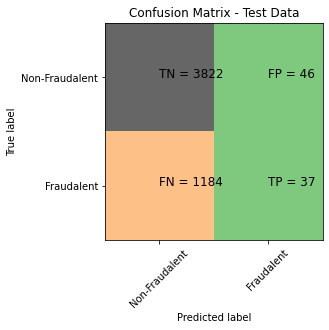

classification Report
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3868
           1       0.45      0.03      0.06      1221

    accuracy                           0.76      5089
   macro avg       0.60      0.51      0.46      5089
weighted avg       0.69      0.76      0.67      5089

XGboost roc_value: 0.6636776736311379
XGBoost threshold: 0.2106599062681198
ROC for the test dataset 66.4%


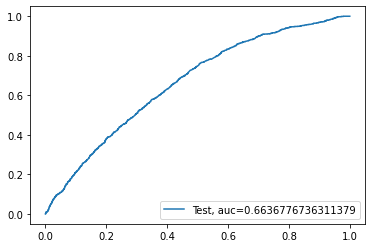

In [90]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = XGBClassifier(bootstrap=True,
                             criterion = 'gini',
                             max_depth=7,
                             min_samples_leaf=0, 
                             min_samples_split=2,
                             max_features=20,
                             n_estimators=25, n_jobs=-1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

XGB_test_score = rfc.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = rfc.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [92]:
XGB_probs_test_dataset = XGBmodel.predict_proba(df_test)[:, 1]
np.savetxt("foo.csv", XGB_probs_test_dataset, delimiter=",")
#Using this baseline model we got a score of 0.6355 on the test dataset.